#Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm

In [2]:
# Importing the function to calculate Variance Inflation Factor (VIF)
# VIF is used to detect multicollinearity between features in a regression model.
# High VIF = a feature is highly correlated with other features → unstable coefficients.
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Importing the ANOVA (Analysis of Variance) function for comparing regression models.
# anova_lm() helps check whether adding or removing features (variables) significantly
# improves the regression model using hypothesis testing.
from statsmodels.stats.anova import anova_lm


#Simple Linear Regression

In [3]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=10622062e17b856d0ad670c00f2b1bdcd689f17433886a8ba27179a407e10cf7
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [4]:
# Importing the function to load datasets that come with the ISLP package.
# ISLP = "Introduction to Statistical Learning with Python" library.
# load_data() allows you to easily access all example datasets used in the book.
from ISLP import load_data


# Importing modeling utilities from ISLP.models
from ISLP.models import (
    ModelSpec as MS,   # MS helps define model formulas (like R-style formulas).
                       # Example: MS('Y ~ X1 + X2') or MS('Y ~ poly(X, 3)')

    summarize,         # summarize() prints a clean, readable summary of fitted models.
                       # It's similar to model.summary() in statsmodels, but cleaner.

    poly               # poly() generates polynomial features for regression.
                       # Example: poly(X, degree=3) creates X, X^2, X^3 automatically.
)


In [5]:
dir()

#dir() is a built-in Python function that returns a list of all attributes available
#in the current namespace, or inside a specific object/module/class.
#Think of dir() as asking Python:
#“What names do you know right now?”
#or
#“What functions, variables, and methods exist inside this object?”

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'pd',
 'plt',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [6]:
Boston = load_data('Boston')   # Load the "Boston" housing dataset from the ISLP package.
                               # This dataset contains information about housing prices
                               # and neighborhood features in Boston.

Boston.head()                  # Display the first 5 rows of the dataset.
                               # Useful for quickly checking the structure, columns,
                               # and sample values in the DataFrame.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
# Creating a new DataFrame 'X' that will act as the design matrix (input features)
X = pd.DataFrame({

    # 1. 'Intercept': This column is full of 1s.
    #    It represents the intercept/bias term in a linear regression model.
    #    Regression formulas need this column if you are fitting the model manually.
    'Intercept': np.ones(Boston.shape[0]),

    # 2. 'lstat': This is the predictor variable taken from the Boston dataset.
    #    'lstat' = percentage of lower-status population.
    #    This variable is often used to predict median house value (medv).
    'lstat': Boston['lstat']
})

In linear regression, model looks like:

$$
y = \beta_0 + X\beta_1
$$

To compute this using matrix algebra, we need:
- A column of 1s (for $\beta_0$, the intercept)
- A column containing the actual predictor values (here, lstat)

So, the resulting matrix looks like:

In [9]:
X.head()

,Intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [10]:
# Extracting the response variable (target)
# 'medv' = median value of owner-occupied homes in $1000s.
y = Boston['medv']


# Creating a simple linear regression model using statsmodels.
# OLS = Ordinary Least Squares → a method to find the best-fitting regression line.
# This line minimizes the sum of squared errors between predictions and actual values.
model = sm.OLS(y, X)


# Fitting the model to the data.
# This calculates the coefficients (β0, β1) for:
#     medv = β0 + β1 * lstat
results = model.fit()


1️⃣ `y = Boston['medv']`

You select the target variable you want to predict.

- medv = median house price

- This is what the regression model will try to estimate.

2️⃣ `model = sm.OLS(y, X)`

You set up an Ordinary Least Squares regression model.

- X = input features (Intercept + lstat)

- y = output (house prices)

But at this stage, the model is not yet fitted.

This is like saying:

“I want to fit a linear model, but haven’t calculated the coefficients yet.”

3️⃣ `results = model.fit() `

In [11]:
# Display a clean, simplified summary of the regression results.
# summarize() is an ISLP helper function that formats the output nicely
# compared to the full Statsmodels .summary() table.
summarize(results)


,coef,std err,t,P>|t|
Intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


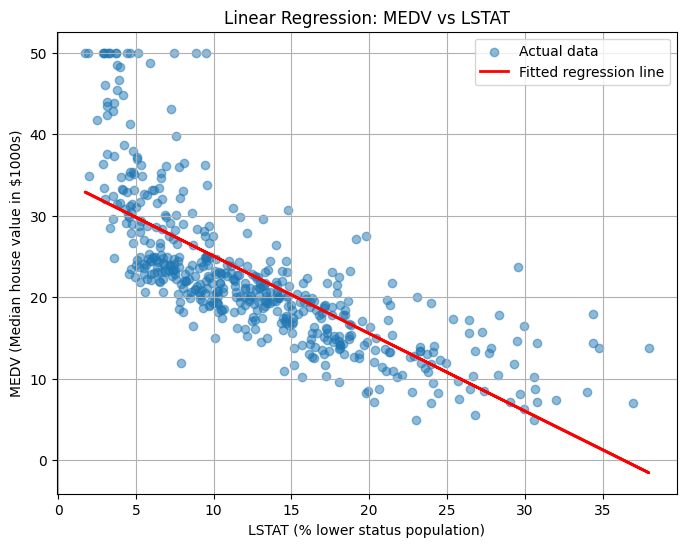

In [12]:
# ---------------------------------------------------------------
# 1. Extract the predictor (X variable) and the response (Y variable)
# ---------------------------------------------------------------

# 'lstat' = percentage of lower-status population.
# This is the independent variable (predictor).
x = Boston['lstat']

# 'medv' = median value of homes (in $1000s).
# This is the dependent variable (target variable).
y = Boston['medv']


# ---------------------------------------------------------------
# 2. Generate predicted values using the fitted regression model
# ---------------------------------------------------------------

# results.predict(X) uses the model's learned coefficients (β0 and β1)
# to compute predicted house prices for each value of 'lstat'.
#
# The formula is:
#   ŷ = β0 + β1 * lstat
#
# y_pred contains the predicted values for plotting the regression line.
y_pred = results.predict(X)


# ---------------------------------------------------------------
# 3. Create the figure where the plots will be drawn
# ---------------------------------------------------------------

plt.figure(figsize=(8, 6))
# figsize sets the plot size (width=8 inches, height=6 inches).


# ---------------------------------------------------------------
# 4. Plot the actual data (scatter plot)
# ---------------------------------------------------------------

# Each blue dot represents one observation from the dataset
# showing the relationship between LSTAT and MEDV.
plt.scatter(
    x,                     # x-axis values (lstat)
    y,                     # y-axis values (medv)
    alpha=0.5,             # transparency so overlapping points are visible
    label="Actual data"    # label for the legend
)


# ---------------------------------------------------------------
# 5. Plot the regression line (fitted model)
# ---------------------------------------------------------------

# The regression line is drawn using predicted values (y_pred).
# It shows the model's estimated linear relationship between X and Y.
plt.plot(
    x,                     # x-axis (same X used for predictions)
    y_pred,                # model-predicted Y values
    color='red',           # color of the regression line
    linewidth=2,           # thickness of the regression line
    label="Fitted regression line"  # appears in legend
)


# ---------------------------------------------------------------
# 6. Label the plot for clarity
# ---------------------------------------------------------------

plt.xlabel("LSTAT (% lower status population)")  # x-axis label
plt.ylabel("MEDV (Median house value in $1000s)") # y-axis label
plt.title("Linear Regression: MEDV vs LSTAT")      # plot title


# ---------------------------------------------------------------
# 7. Show legend and grid
# ---------------------------------------------------------------

plt.legend()   # displays labels for the scatter points & regression line
plt.grid(True) # adds grid lines for better readability


# ---------------------------------------------------------------
# 8. Display the final plot
# ---------------------------------------------------------------

plt.show()     # renders the full plot


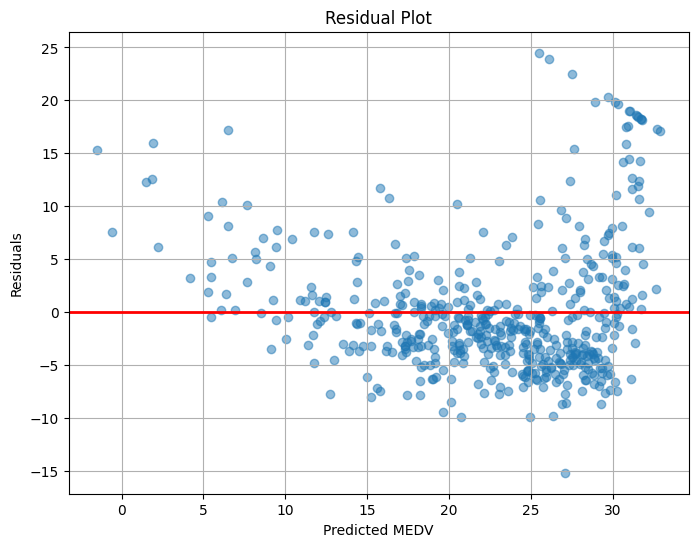

In [13]:
# ---------------------------------------------------------------
# 1. Extract residuals from the fitted model
# ---------------------------------------------------------------

# results.resid gives the difference between actual values (y)
# and predicted values (ŷ).
#
#   residual = actual - predicted
#
# Residuals help us evaluate whether the model assumptions hold.
residuals = results.resid


# ---------------------------------------------------------------
# 2. Create a new figure for the residual plot
# ---------------------------------------------------------------

plt.figure(figsize=(8, 6))
# figsize sets width=8 inches and height=6 inches.


# ---------------------------------------------------------------
# 3. Scatter plot of predicted values vs residuals
# ---------------------------------------------------------------

# Why plot this?
# - Helps check if residuals follow a random pattern.
# - We want NO clear shape → randomness = good model.
#
# x-axis = predicted values from the model
# y-axis = residuals (errors)
plt.scatter(
    y_pred,         # predicted MEDV values (ŷ)
    residuals,      # residuals (errors)
    alpha=0.5       # transparency to handle overlapping points
)


# ---------------------------------------------------------------
# 4. Draw a horizontal reference line at 0 residual
# ---------------------------------------------------------------

# This red line indicates zero error.
# Ideally, residuals should be evenly scattered above & below this line.
plt.axhline(
    0,              # y-position = 0
    color='red',    # color of the reference line
    linewidth=2     # thickness
)


# ---------------------------------------------------------------
# 5. Label axes and add title
# ---------------------------------------------------------------

plt.xlabel("Predicted MEDV")      # predicted home values
plt.ylabel("Residuals")           # prediction errors
plt.title("Residual Plot")        # plot title


# ---------------------------------------------------------------
# 6. Add a grid for readability
# ---------------------------------------------------------------

plt.grid(True)


# ---------------------------------------------------------------
# 7. Show the final plot
# ---------------------------------------------------------------

plt.show()


**🧠 What This Plot Tells You (Interpretation)**


✔ What you WANT to see:

- Residuals randomly scattered around zero

- No visible pattern (no curve, no funnel shape)

This means:

- Linearity assumption holds

- Errors have constant variance (homoscedasticity)

- Model is appropriate

**❌ What indicates a problem?**

- 1️⃣ Curved pattern → Non-linear relationship: Suggests you may need polynomial regression (e.g., poly(lstat, 2)).

- 2️⃣ Funnel shape (widening residuals) → Heteroscedasticity: Variance increases with predictions → violates OLS assumptions.

- 3️⃣ Outliers → Large vertical points: These points influence your regression heavily.

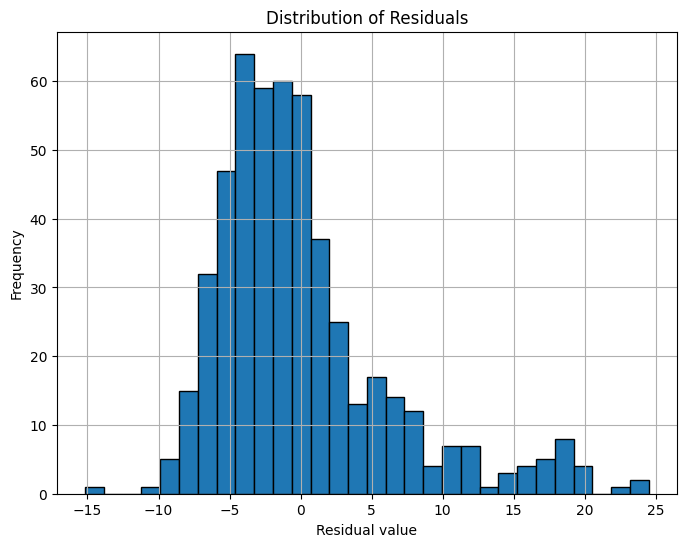

In [14]:
# ---------------------------------------------------------------
# 1. Create a new figure for the histogram
# ---------------------------------------------------------------

plt.figure(figsize=(8, 6))
# figsize sets the width=8 inches and height=6 inches of the plot.


# ---------------------------------------------------------------
# 2. Plot a histogram of residuals
# ---------------------------------------------------------------

plt.hist(
    residuals,       # data to visualize → model residuals (errors)
    bins=30,         # number of bars (more bins = smoother shape)
    edgecolor="black"  # outline around each bar for clarity
)

# Why this plot?
# A histogram helps check if the residuals are *approximately normal*.
# Linear regression assumes residuals follow a normal distribution.
# A roughly bell-shaped curve = good.


# ---------------------------------------------------------------
# 3. Add title and axis labels
# ---------------------------------------------------------------

plt.title("Distribution of Residuals")    # title of the plot
plt.xlabel("Residual value")              # x-axis label
plt.ylabel("Frequency")                   # y-axis label


# ---------------------------------------------------------------
# 4. Add grid lines for readability
# ---------------------------------------------------------------

plt.grid(True)


# ---------------------------------------------------------------
# 5. Display the final plot
# ---------------------------------------------------------------

plt.show()


**🧠 What This Plot Tells You**

This histogram helps you check whether residuals (errors) behave normally.

**✔ What you WANT to see:**

- A roughly symmetric bell-shaped curve

- Centered around zero

This means the model:

- Has normally distributed errors

- Appropriately fits the linear pattern

- Likely satisfies linear regression assumptions

**❌ What indicates a problem?**

1️⃣ Skewed histogram

- Residuals lean heavily left or right

- Suggests non-linearity or missing predictors

2️⃣ Long tails

- Indicates outliers

- Might require robust regression

3️⃣ Multiple peaks

- Suggests dataset may have subgroups

- Sometimes fixed using interaction terms or transformed variables

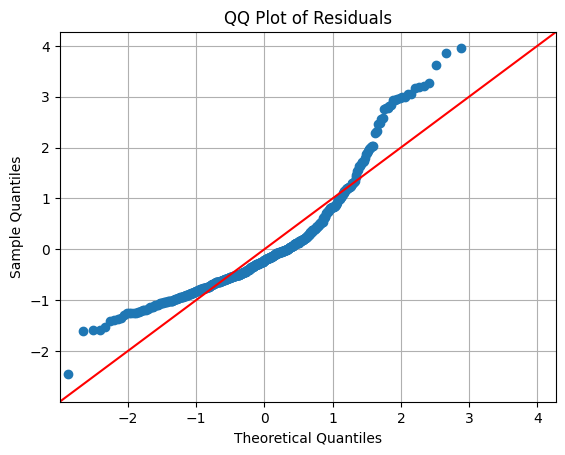

In [15]:
# ---------------------------------------------------------------
# 1. Create a QQ Plot (Quantile–Quantile Plot) for residuals
# ---------------------------------------------------------------

# sm.qqplot() compares the distribution of your residuals (errors)
# to a perfect normal distribution.
#
# If residuals follow a normal distribution:
#   → points lie close to the 45° reference line.
#
# This checks the "normality of errors" assumption in linear regression.

sm.qqplot(
    residuals,   # the raw residuals from your OLS model
    line='45',   # draw a 45-degree reference line (perfect normality)
    fit=True     # standardizes residuals before plotting (recommended)
)


# ---------------------------------------------------------------
# 2. Add title and formatting
# ---------------------------------------------------------------

plt.title("QQ Plot of Residuals")  # title for the plot
plt.grid(True)                     # adds a grid for readability


# ---------------------------------------------------------------
# 3. Display the plot
# ---------------------------------------------------------------

plt.show()


**🧠 What a QQ Plot Means (Simple Interpretation)**

A QQ plot visually checks whether your model's residuals are normally distributed.

✔ If points follow the straight line → Normal distribution

This means:

- OLS assumptions are satisfied

- Model is stable

- Confidence intervals and p-values are reliable

- Perfect scenario.

**❌ If points deviate from the line:**

1️⃣ S-shaped curve → skewed residuals

- Indicates non-linearity or wrong transformation.

2️⃣ Points curve upward or downward → heavy tails

- Outliers or extreme values present.

3️⃣ Systematic curve pattern → model is missing structure

May need:

- Polynomial terms

- Log transform

- More predictors

4️⃣ Random scatter around line → acceptable noise
Small deviations are normal.

#Using Transformations: Fit and Transform

In [16]:
# ---------------------------------------------------------------
# 1. Create a ModelSpec (MS) object describing the model design
# ---------------------------------------------------------------

# MS(['lstat']) tells ISLP:
#   "I want my design matrix X to include only the predictor 'lstat'."
#
# This is similar to specifying a formula in statsmodels:
#   Y ~ lstat
#
# But ModelSpec allows more flexible transformations later (poly, interactions, etc.)
design = MS(['lstat'])


# ---------------------------------------------------------------
# 2. Fit the design specification to the dataset
# ---------------------------------------------------------------

# design.fit(Boston) analyzes the dataset and stores any information needed
# to later transform the data.
#
# Example:
# - For polynomial features, it determines degree
# - For categorical variables, it determines category levels
# - For interactions, it identifies needed expansions
#
# Here, since lstat is numeric, it simply prepares the transformation rules.
design = design.fit(Boston)


# ---------------------------------------------------------------
# 3. Generate the design matrix X (the transformed feature matrix)
# ---------------------------------------------------------------

# fit_transform:
#   → Applies the design rules to the dataset
#   → Returns a NumPy array or DataFrame containing the predictor values
#
# For MS(['lstat']), this produces a variable matrix with:
#   - A column for the intercept (added automatically by ModelSpec)
#   - A column for 'lstat'
#
# Equivalent to manually doing earlier:
#   X = [1, lstat]
X = design.fit_transform(Boston)


# ---------------------------------------------------------------
# 4. Display the first 4 rows of the design matrix
# ---------------------------------------------------------------

# Shows the first few transformed rows to understand the structure.
X[:4]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [17]:
# ---------------------------------------------------------------
# 1. Create a ModelSpec object for the predictor 'lstat'
# ---------------------------------------------------------------

# MS(['lstat']) tells ISLP:
#   "My model will use ONLY the variable 'lstat' as a predictor."
#
# ModelSpec is a formula-like interface that automatically:
#   - Adds an intercept column
#   - Validates variables
#   - Prepares design matrices for regression
design = MS(['lstat'])


# ---------------------------------------------------------------
# 2. Convert the Boston DataFrame into a design matrix X
# ---------------------------------------------------------------

# fit_transform() does two things:
#   (1) Learns any rules needed to transform data (here, nothing special)
#   (2) Returns a design matrix ready for regression
#
# IMPORTANT:
# ModelSpec automatically adds a column of 1s → the intercept.
#
# So X will contain:
#   - Intercept column
#   - lstat column
X = design.fit_transform(Boston)


# ---------------------------------------------------------------
# 3. Display the first 4 rows of the design matrix
# ---------------------------------------------------------------

# Shows the NumPy array structure created by ModelSpec
X[:4]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           5.08e-88
Time:                        04:04:52   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

# 📊 **OLS Regression Summary — Explained in Simple Terms**

This output comes from:

```python
results.summary()
```

It provides a full statistical report of a **simple linear regression model** predicting **MEDV (median home value)** using **LSTAT (% lower-status population)** from the Boston Housing dataset.

---

# 🧩 **1. Model Information**

| Term                      | Meaning                                               |
| ------------------------- | ----------------------------------------------------- |
| **Dep. Variable:** `medv` | The value we want to predict (house price).           |
| **Model:** OLS            | Ordinary Least Squares regression.                    |
| **Method:** Least Squares | The technique used to find the best-fitting line.     |
| **Observations:** 506     | Total number of houses in the dataset.                |
| **Df Residuals:** 504     | Degrees of freedom after estimating model parameters. |
| **Df Model:** 1           | Number of predictors (only `lstat`).                  |

---

# 📈 **2. Model Fit Statistics**

| Metric                           | Meaning                                                                |
| -------------------------------- | ---------------------------------------------------------------------- |
| **R-squared = 0.544**            | `lstat` explains **54.4%** of the variation in house prices.           |
| **Adj. R-squared = 0.543**       | Adjusted R² (similar here because only 1 predictor).                   |
| **F-statistic = 601.6**          | Tests if the model overall is meaningful. Very high → strong evidence. |
| **Prob(F-statistic) = 5.08e-88** | p-value ≈ 0 → the model is statistically significant.                  |
| **Log-Likelihood = -1641.5**     | Measure used internally by the model to compute AIC/BIC.               |
| **AIC = 3287, BIC = 3295**       | Used to compare models (lower is better).                              |

---

# ⚙️ **3. Coefficients Table**

This table shows the estimated regression equation:

[
\text{medv} = 34.5538 - 0.95 \times \text{lstat}
]

### ✔ **Intercept = 34.5538**

When `lstat = 0`, the predicted median house value is about **$34,553**.

### ✔ **Slope for lstat = -0.9500**

For every **1% increase** in lower-status population, **house value decreases by about $950** (in thousands).

---

# 🔬 **4. Statistical Tests for Coefficients**

| Column             | Meaning                                               |    |                                                |
| ------------------ | ----------------------------------------------------- | -- | ---------------------------------------------- |
| **coef**           | Value of the estimated parameter (Intercept & slope). |    |                                                |
| **std err**        | Standard error—uncertainty of the estimate.           |    |                                                |
| **t**              | t-statistic testing if coefficient = 0.               |    |                                                |
| **P>               | t                                                     | ** | p-value—smaller values mean stronger evidence. |
| **[0.025, 0.975]** | 95% confidence interval.                              |    |                                                |

### Key observations:

* Both coefficients have **p-values = 0.000**, meaning they are **highly statistically significant**.
* The slope's confidence interval **does not include 0**, confirming a strong negative relationship.

---

# 🧪 **5. Residual Diagnostics**

These tests check whether regression assumptions are met.

| Metric                    | Meaning                                                              |
| ------------------------- | -------------------------------------------------------------------- |
| **Omnibus = 137.043**     | Tests normality of residuals. High value → not normal.               |
| **Prob(Omnibus) = 0.000** | p-value ~ 0 → residuals are *not* normally distributed.              |
| **Skew = 1.453**          | Residuals are right-skewed (asymmetric).                             |
| **Kurtosis = 5.319**      | Heavy tails (more extreme values than normal).                       |
| **Jarque–Bera = 291.373** | Also tests normality—large value shows deviation.                    |
| **Prob(JB) = 5.36e-64**   | p-value ≈ 0 → residuals not normal.                                  |
| **Durbin–Watson = 0.892** | Indicates autocorrelation in residuals (< 2 = positive correlation). |

### ✔ Interpretation:

Residuals are **not perfectly normal**, meaning the linear model does not capture all structure in the data. A **polynomial model** or additional predictors might improve fit.

---

# 🏁 **Final Summary**

* There is a **strong, statistically significant negative relationship** between `lstat` and house prices.
* The model explains **about 54%** of price variation—good for a single predictor.
* However, residual diagnostics show:

  * Non-normality
  * Autocorrelation
  * Skewed errors

These indicate that a **simple linear model may not fully capture the relationship**. Polynomial regression (e.g., `lstat²`) often improves the fit.

---



In [18]:
results.params
#The fitted coefficients can also be retrieved as
# the params attribute of results.

,0
Intercept,34.553841
lstat,-0.950049


#The get_prediction() method can be used to obtain predictions, and.get_
produce confidence intervals and prediction intervals for the prediction of prediction()
medv for given values of lstat.
We first create a new data frame, in this case containing only the vari-
able lstat, with the values for this variable at which we wish to make
predictions. We then use the transform() method of design to create the
corresponding model matrix.

In [23]:
# Create a new DataFrame containing new values of the predictor 'lstat'
# These are the values for which we want to make predictions
new_df = pd.DataFrame({'lstat': [5, 10, 15]})

# Use the already-fitted design matrix object to transform the new data
# This step applies the SAME transformations used during model training,
# such as:
# - adding the intercept column (constant term)
# - applying any polynomial terms, splines, or feature encoding (if defined)
#
# IMPORTANT:
# We use transform() instead of fit_transform() to avoid refitting
# the design on new data and to keep the feature structure consistent.
newX = design.transform(new_df)

# Display the transformed design matrix
# This matrix is now in the correct numerical format required by the model
# for making predictions or further analysis
newX


,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [24]:
# Use the fitted model ('results' object) to make predictions on the new transformed data
# get_prediction() creates prediction objects that contain various information:
# - predicted values
# - confidence intervals
# - standard errors
# - etc.
new_predictions = results.get_prediction(new_X)
# 'results' is typically a statsmodels regression results object
# 'new_X' is the design matrix we just created for our new data points

# Extract just the predicted mean values (the actual predictions)
# .predicted_mean returns an array of the predicted response values
# For a house price prediction example with lstat values [5, 10, 15]:
# This would give us the predicted median house price for each lstat value
new_predictions.predicted_mean
# Output might look like: array([30.5, 25.2, 20.1])
# Meaning: when lstat=5%, predicted price = $30.5K
#          when lstat=10%, predicted price = $25.2K
#          when lstat=15%, predicted price = $20.1K

# You could also access other prediction information:
# new_predictions.conf_int(alpha=0.05)  # 95% confidence intervals
# new_predictions.se_mean               # Standard errors of predictions
# new_predictions.summary_frame()       # Full prediction summary as DataFrame

array([29.80359411, 25.05334734, 20.30310057])

In [26]:
# Compute the confidence intervals for the predictions
# 'new_predictions' is the PredictionResults object returned by get_prediction()
#
# alpha = 0.05 specifies a 95% confidence level:
#   Confidence level = 1 - alpha = 0.95
#
# This method returns a lower and upper bound for each prediction,
# indicating the range within which the true mean response is expected
# to lie with 95% confidence.
new_predictions.conf_int(alpha=0.05)

# Instead of giving only a single predicted value,
# this line tells us how uncertain that prediction is.
#
# It answers the question:
# "What is the range in which the true value is likely to fall?"

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [28]:
# Compute the prediction intervals for the new observations
# 'obs=True' tells statsmodels to include observation-level uncertainty
# (i.e., both model uncertainty AND random noise in individual observations)
#
# alpha = 0.05 corresponds to a 95% prediction interval
#   Prediction level = 1 - alpha = 0.95
#
# The resulting interval answers the question:
# "Where is a NEW, individual observation likely to fall?"
new_predictions.conf_int(obs=True, alpha=0.05)

# This is different from a confidence interval for the mean.
#
# - Confidence interval (obs=False, default):
#     Uncertainty in the estimated MEAN response.
#
# - Prediction interval (obs=True):
#     Uncertainty in predicting a NEW individual data point.
#
# Because individual observations include random noise,
# prediction intervals are always wider than confidence intervals.


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

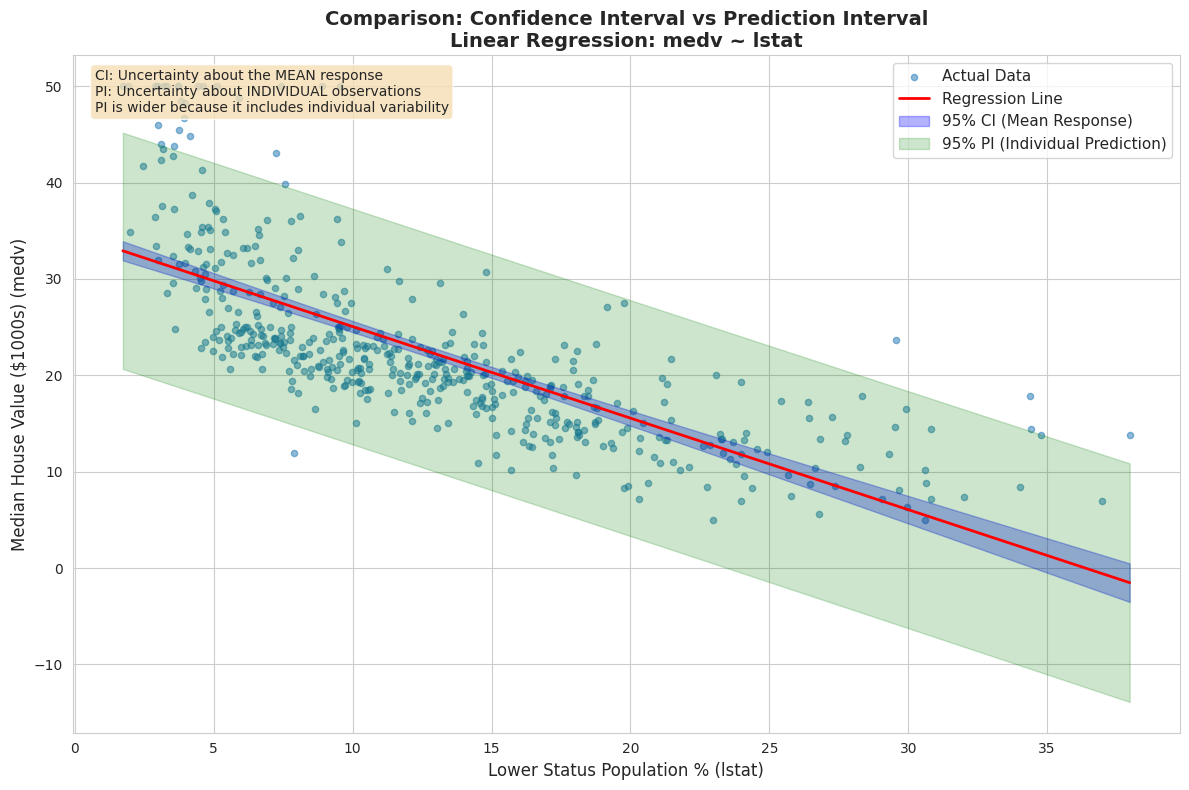

COMPARISON OF CI AND PI FOR DIFFERENT LSTAT VALUES
lstat      Predicted medv  CI Lower        CI Upper        PI Lower        PI Upper       
--------------------------------------------------------------------------------
5          $29.80          $29.01          $30.60          $17.57          $42.04         
10         $25.05          $24.47          $25.63          $12.83          $37.28         
15         $20.30          $19.73          $20.87          $8.08           $32.53         
20         $15.55          $14.77          $16.33          $3.32           $27.79         
25         $10.80          $9.72           $11.89          $-1.46          $23.06         

KEY DIFFERENCES:
1. CI (Confidence Interval): Range for the AVERAGE/MEAN response at given X
2. PI (Prediction Interval): Range for INDIVIDUAL observations at given X
3. PI is ALWAYS WIDER than CI because it includes:
   - Uncertainty in estimating the mean (like CI)
   - Additional variability of individual observation

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create a range of lstat values for visualization
lstat_range = np.linspace(Boston['lstat'].min(), Boston['lstat'].max(), 100)
X_range = pd.DataFrame({'lstat': lstat_range})
X_range_design = design.transform(X_range)

# Get predictions and intervals
predictions = results.get_prediction(X_range_design)
pred_mean = predictions.predicted_mean
ci = predictions.conf_int(alpha=0.05)  # 95% CI
pi = predictions.conf_int(obs=True, alpha=0.05)  # 95% PI

# Plot the data
plt.scatter(Boston['lstat'], Boston['medv'], alpha=0.5, label='Actual Data', s=20)

# Plot regression line
plt.plot(lstat_range, pred_mean, 'r-', label='Regression Line', linewidth=2)

# Plot Confidence Interval (CI)
plt.fill_between(lstat_range, ci[:, 0], ci[:, 1],
                 alpha=0.3, color='blue', label='95% CI (Mean Response)')

# Plot Prediction Interval (PI)
plt.fill_between(lstat_range, pi[:, 0], pi[:, 1],
                 alpha=0.2, color='green', label='95% PI (Individual Prediction)')

# Add labels and title
plt.xlabel('Lower Status Population % (lstat)', fontsize=12)
plt.ylabel('Median House Value ($1000s) (medv)', fontsize=12)
plt.title('Comparison: Confidence Interval vs Prediction Interval\nLinear Regression: medv ~ lstat',
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.tight_layout()

# Add annotation explaining the difference
plt.text(0.02, 0.98,
         'CI: Uncertainty about the MEAN response\nPI: Uncertainty about INDIVIDUAL observations\nPI is wider because it includes individual variability',
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.show()

# Print comparison table for specific values
print("="*80)
print("COMPARISON OF CI AND PI FOR DIFFERENT LSTAT VALUES")
print("="*80)
print(f"{'lstat':<10} {'Predicted medv':<15} {'CI Lower':<15} {'CI Upper':<15} {'PI Lower':<15} {'PI Upper':<15}")
print("-"*80)

for lstat_val in [5, 10, 15, 20, 25]:
    new_df = pd.DataFrame({'lstat': [lstat_val]})
    newX = design.transform(new_df)
    pred = results.get_prediction(newX)

    ci = pred.conf_int(alpha=0.05)[0]
    pi = pred.conf_int(obs=True, alpha=0.05)[0]

    print(f"{lstat_val:<10} ${pred.predicted_mean[0]:<14.2f} ${ci[0]:<14.2f} ${ci[1]:<14.2f} ${pi[0]:<14.2f} ${pi[1]:<14.2f}")

print("="*80)
print("\nKEY DIFFERENCES:")
print("1. CI (Confidence Interval): Range for the AVERAGE/MEAN response at given X")
print("2. PI (Prediction Interval): Range for INDIVIDUAL observations at given X")
print("3. PI is ALWAYS WIDER than CI because it includes:")
print("   - Uncertainty in estimating the mean (like CI)")
print("   - Additional variability of individual observations around the mean")
print("   - Residual error (ε) from the model")

# Calculate and display the width differences
print("\n" + "="*80)
print("INTERVAL WIDTH COMPARISON:")
print("="*80)
print(f"{'lstat':<10} {'CI Width':<15} {'PI Width':<15} {'Difference':<15}")
print("-"*80)

for lstat_val in [5, 10, 15, 20, 25]:
    new_df = pd.DataFrame({'lstat': [lstat_val]})
    newX = design.transform(new_df)
    pred = results.get_prediction(newX)

    ci = pred.conf_int(alpha=0.05)[0]
    pi = pred.conf_int(obs=True, alpha=0.05)[0]

    ci_width = ci[1] - ci[0]
    pi_width = pi[1] - pi[0]
    difference = pi_width - ci_width

    print(f"{lstat_val:<10} ${ci_width:<14.2f} ${pi_width:<14.2f} ${difference:<14.2f}")

#Defining Functions

In [36]:
def abline(ax, b, m):
    """
    Draw a straight line y = b + m*x (slope m and intercept b to ax) on an existing Matplotlib axis.

    Parameters:
    ax : matplotlib.axes.Axes
        The axis on which the line will be drawn
    b : float
        Intercept of the line
    m : float
        Slope of the line
    """

    # 1. Get the current x-axis limits of the plot (left and right edges)
    # This ensures the line spans the entire visible area.
    xlim = ax.get_xlim()

    # 2. Calculate the corresponding y-values for these x-limits
    # Formula: y = mx + b (Equation of a line)
    # xlim[0] is the min X, xlim[1] is the max X
    ylim = [m * xlim[0] + b, m * xlim[1] + b]

    # 3. Plot the line connecting these two points
    # This draws a straight line from the left edge to the right edge.
    ax.plot(xlim, ylim)

In [37]:
def abline(ax, b, m, *args, **kwargs):
    """
    Draw a straight line y = b + m*x on an existing Matplotlib axis.
    """
    # 1. Capture current view limits
    # We do this so the line spans the entire visible graph, not just where the data is.
    xlim = ax.get_xlim()

    # 2. Calculate Y endpoints based on y = mx + b
    ylim = [m * xlim[0] + b, m * xlim[1] + b]

    # 3. Plot with flexibility (*args, **kwargs)
    # This allows you to pass standard matplotlib styles like color='r', linestyle='--',
    # linewidth=2, or label='My Line' when you CALL the function, without changing the function definition.
    ax.plot(xlim, ylim, *args, **kwargs)

/tmp/ipython-input-1749965674.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0], # The Intercept (approx 34.55)
/tmp/ipython-input-1749965674.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1], # The Slope (approx -0.95)


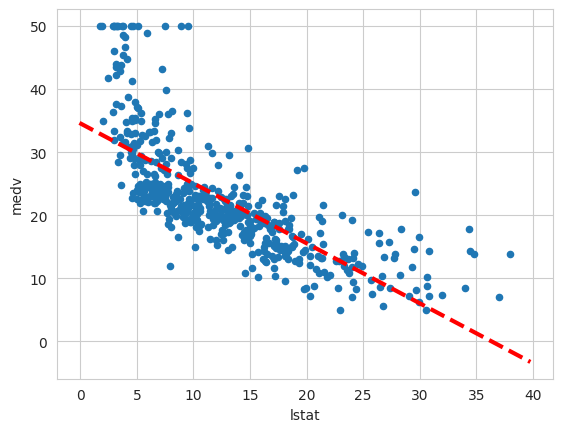

In [41]:
# 1. Create the Scatter Plot
# Pandas has a .plot accessor. This creates a scatter plot of 'lstat' vs 'medv'.
# Crucially, we assign the return value to 'ax'. This captures the matplotlib Axes object
# so we can draw on top of it later.
ax = Boston.plot.scatter('lstat', 'medv')

# 2. Draw the Regression Line
abline(ax,
       results.params[0], # The Intercept (approx 34.55)
       results.params[1], # The Slope (approx -0.95)
       'r--',             # *args: Color/Style (Red Dashed Line) - Note on typo below
       linewidth=3)       # **kwargs: Thickness of the line

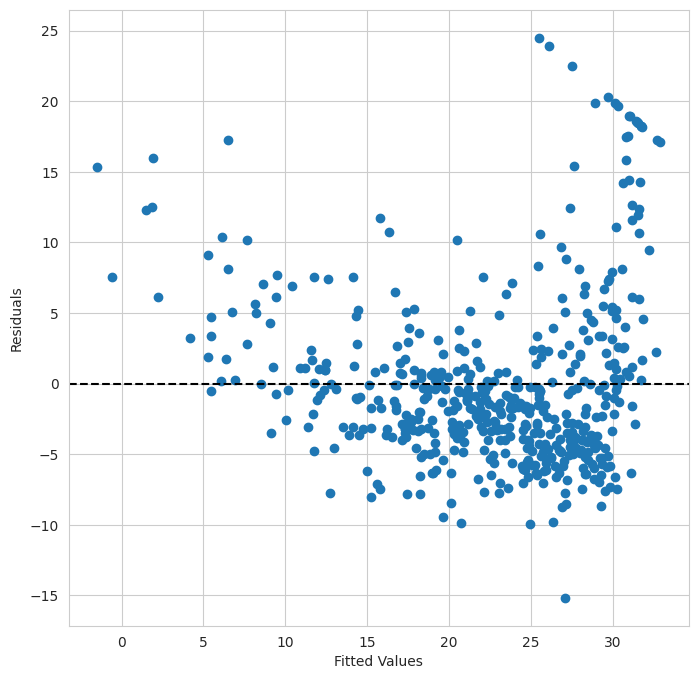

In [43]:
# 1. Create a Figure and Axes
# subplots returns a tuple (Figure, Axes). We take the second element [1] which is the Axes 'ax'.
# figsize=(8, 8) makes the plot a square, which helps in judging distances visually.
ax = subplots(figsize=(8, 8))[1]

# 2. Scatter Plot: Predictions vs Errors
# X-axis (fittedvalues): The price the model PREDICTED.
# Y-axis (resid): The ERROR (Actual Price - Predicted Price).
ax.scatter(results.fittedvalues, results.resid)

# 3. Labeling
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

# 4. Draw the Zero Line
# This represents "Zero Error". Ideally, all points should hover around this line.
# Note: 'las' is an R parameter. In Python/Matplotlib, use 'ls' (linestyle).
ax.axhline(0, c='k', ls='--')

This code generates a **Residual Plot**, which is the most important diagnostic tool to check if your linear model is actually working.

Here is the explanation with comments, followed by how to interpret the shape you will see.


### 2\. How to Read this Plot

This plot answers the question: **"Is a straight line good enough, or do we need a curve?"**

| Pattern You See | What It Means | Diagnosis for Boston Data |
| :--- | :--- | :--- |
| **Random Cloud** | **Good.** The linear model captures the pattern well. | The errors are just random noise. |
| **U-Shape (Smile/Frown)** | **Non-Linearity.** The data is curved, but you forced a straight line through it. | **This is what you will likely see.** The Boston `lstat` data is curved. Your model is consistently wrong in the middle and at the ends. |
| **Funnel Shape (\<)** | **Heteroscedasticity.** The model is less accurate for expensive houses than cheap ones. | Variance is not constant (a violation of OLS assumptions). |

### 3\. Why this matters for your data?

In the `Boston` dataset, the relationship between `lstat` (lower status population) and `medv` (value) is **curved**, not straight.

  * Because you used a simple linear model (`medv ~ lstat`), your residual plot will show a distinct **U-shape**.
  * This proves that a straight line is **underfitting** the data.



Index with highest leverage: 374


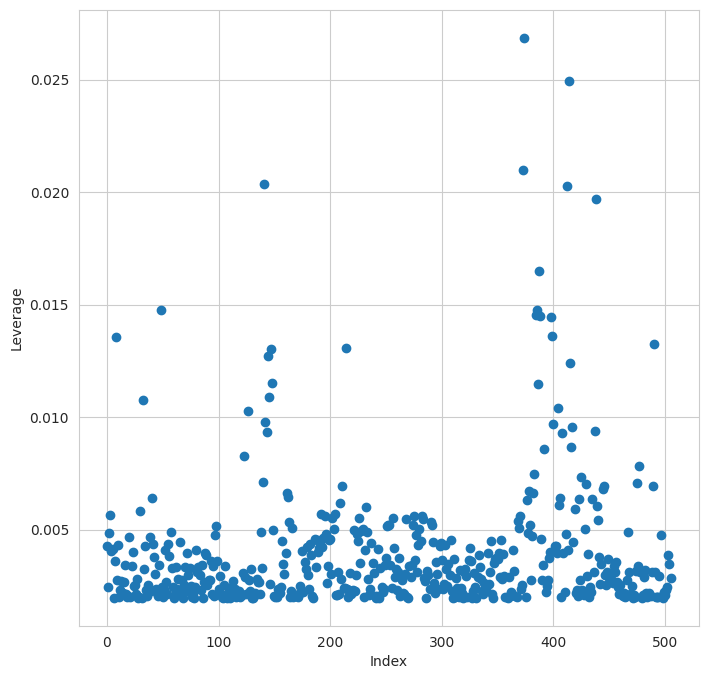

In [45]:
# 1. Get Influence Object
# get_influence() calculates statistics for every single data point
# to see how much "influence" it has on the regression line.
infl = results.get_influence()

# 2. Setup Plot
fig, ax = plt.subplots(figsize=(8, 8))

# 3. Scatter Plot: Index vs Leverage
# X-axis: The index (0 to 506) of each data point.
# Y-axis: The Leverage statistic (hat_matrix_diag).
# CORRECTION: np.arange creates the sequence [0, 1, 2... n]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)

# 4. Labeling
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")

# 5. Find the Maximum Leverage
# np.argmax returns the *index* (row number) of the point with the highest value.
max_leverage_index = np.argmax(infl.hat_matrix_diag)
print(f"Index with highest leverage: {max_leverage_index}")

#Multiple Linear Regression

In [49]:
# 1. Create the Design Matrix for Multiple Regression
# What this line does:
# MS(["lstat", "age"]): Defines a model specification with two predictors:
#   - lstat: % lower-status population
#   - age: proportion of owner-occupied units built before 1940
#
# .fit_transform(Boston):
#   - fit() learns how to build the design matrix from the dataset (e.g., checking data types)
#   - transform() converts the raw data into a numerical matrix suitable for OLS
#   - Automatically adds an intercept column (column of 1s) to the matrix
X = MS(["lstat", "age"]).fit_transform(Boston)

# 2. Fit the Multiple Linear Regression Model
# We are now fitting a plane (3D), not a line (2D)
model1 = sm.OLS(y, X)
results1 = model1.fit()

# 3. View the Results
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [50]:
# 1. Get the list of all predictors
# Boston.columns: Returns an Index object containing all column names in the dataframe.
# .drop("medv"): Returns a new Index with the 'medv' (target) column removed.
# Note: This does NOT delete the column from the 'Boston' dataframe itself;
# it just creates a list of strings excluding 'medv'.
terms = Boston.columns.drop("medv")

# 2. View the list
# This confirms you have the 12 predictor variables ready for the next step.
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [51]:
# 1. Create Design Matrix with ALL predictors
# MS(terms): Uses the list of 12 variable names we created earlier.
# .fit_transform(Boston):
#   - Scans all 12 columns.
#   - Generates the matrix X (506 rows x 13 columns).
#   - The 13th column is the Intercept (column of 1s).
X = MS(terms).fit_transform(Boston)

# 2. Fit the Full OLS Model
# We are now finding the "best fit" hyperplane in a 13-dimensional space.
model = sm.OLS(y, X)
results = model.fit()

# 3. View the Summary Table
# This is the most critical step. It shows which of the 12 variables
# actually matter when all others are accounted for.
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [54]:
# 1. Create a Reduced List of Predictors
# We drop "medv" (because it's the target) AND "age" (because it had a high p-value previously).
minus_age = Boston.columns.drop(["medv", "age"])

# 2. Create the New Design Matrix
# This builds a matrix X with only 11 predictors (plus the intercept).
Xma = MS(minus_age).fit_transform(Boston)

# 3. Fit the "Reduced" Model
# We are asking: "Can we predict price just as well WITHOUT knowing the age of the house?"
modelma = sm.OLS(y, Xma)
resultsma = modelma.fit()

# 4. View Results
# We check the R-squared. If it barely changes from the full model,
# it proves that 'age' was indeed unnecessary.
summarize(resultsma)

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


#Multivariate Goodness of Fit

In [59]:
# 1. Calculate VIF for each predictor
# X.shape[1] is the number of columns.
# We use range(1, ...) to start from 1 and SKIP index 0 (the Intercept).
# The Intercept always has high VIF but it doesn't matter for analysis.
vals = [VIF(X, i) for i in range(1, X.shape[1])]

# 2. Create a readable DataFrame
# index=X.columns[1:] ensures the labels match the variables (skipping intercept)
vif = pd.DataFrame({"vif": vals}, index=X.columns[1:])

# 3. Display the VIF table
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [61]:
# 1. Initialize an empty list
# We need a place to store the VIF score for each variable.
vals = []

# 2. Start the Loop
# X.values: Converts the Pandas DataFrame 'X' into a raw NumPy array.
#           (Some versions of statsmodels prefer arrays over DataFrames).
# .shape[1]: The number of columns in the matrix (e.g., 13 columns).
# range(1, ...): We start at 1 to SKIP the Intercept column (index 0).
#                We only want to test the actual predictors.
for i in range(1, X.values.shape[1]):

    # 3. Calculate VIF for the current column 'i'
    # We pass the whole array (X.values) and the index of the column we want to check (i).
    vif_score = VIF(X.values, i)

    # 4. Add the result to our list
    vals.append(vif_score)

# After this loop, 'vals' contains the VIF scores for all your variables.

# Interaction Terms

In [63]:
# 1. Create Design Matrix with an Interaction Term
# The list passed to ModelSpec (MS) has three items:
#   1. "lstat": Main effect of status.
#   2. "age": Main effect of age.
#   3. ("lstat", "age"): The tuple (parentheses) tells ISLP to create an INTERACTION.
#      It mathematically calculates: New_Column = lstat * age
X = MS(["lstat", "age", ("lstat", "age")]).fit_transform(Boston)

# 2. Fit the Interaction Model
model2 = sm.OLS(y, X)

# 3. View Results
# You will now see a new row in the table, likely named "lstat:age".
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


#Non-linear Transformations of the Predictors

In [71]:
# 1. Create Design Matrix with Polynomials
# poly("lstat", degree=2): This tells the model to create TWO columns for 'lstat':
#    - Column 1: lstat (The linear term)
#    - Column 2: lstat^2 (The quadratic/squared term)
# We also keep 'age' as a standard linear predictor.
X = MS([poly("lstat", degree=2), "age"]).fit_transform(Boston)

# 2. Fit the Polynomial Model
# The model will now try to fit a Parabola (curve) instead of a straight line.
model3 = sm.OLS(y, X)
results3 = model3.fit()

# 3. View Results
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [72]:
# Compare Model 1 (Linear) vs Model 3 (Polynomial)
# results1: medv ~ lstat + age
# results3: medv ~ lstat + lstat^2 + age
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


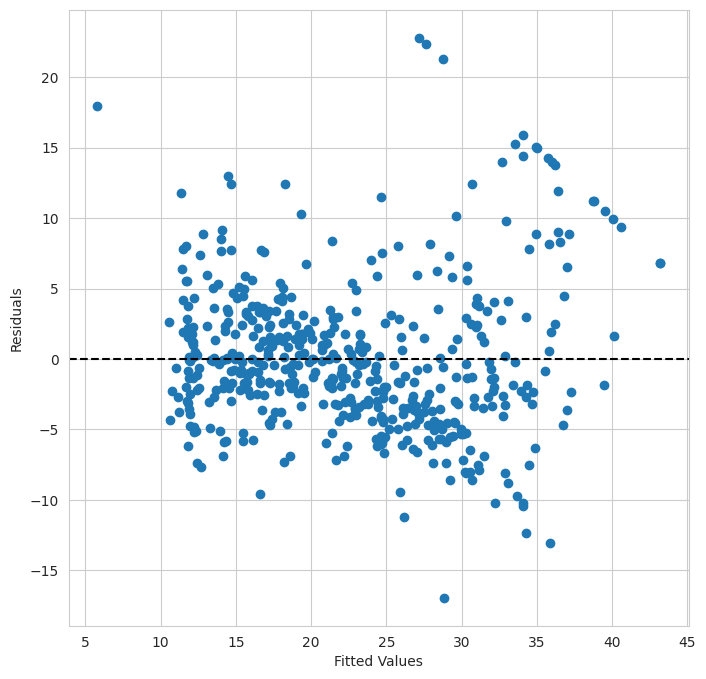

In [74]:
# 1. Setup Plot
ax = subplots(figsize=(8, 8))[1]

# 2. Scatter Plot: Predictions vs Errors
# We are plotting the residuals of the POLYNOMIAL model (results3)
ax.scatter(results3.fittedvalues, results3.resid)

# 3. Labels
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

# 4. Zero Line (Corrected)
# c='k' (black), ls='--' (dashed)
ax.axhline(0, c="k", ls="--")

#3.6.7 Qualitative Predictors

In [76]:
Carseats = load_data("Carseats")
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [78]:
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize
import statsmodels.api as sm

# 1. Load Data
Carseats = load_data("Carseats")

# 2. Prepare Variable List
# We convert the index to a standard Python list so we can add to it later.
allvars = list(Carseats.columns.drop("Sales"))

# 3. Add Interaction Terms to the list
# We want all original variables PLUS two specific interactions:
#   - Income * Advertising
#   - Price * Age
final = allvars + [("Income", "Advertising"), ("Price", "Age")]

# 4. Create Design Matrix
# Note: MS takes the list 'final', THEN we call .fit_transform
design = MS(final)
X = design.fit_transform(Carseats)

# 5. Define Target
y = Carseats["Sales"]

# 6. Fit and Summarize
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


This code applies the same regression concepts you just learned (Multiple Regression + Interactions) to a new dataset, **`Carseats`**, which includes categorical (qualitative) variables.


### \1. Key New Concept: Qualitative Variables

The `Carseats` dataset contains text columns like `ShelveLoc` (Shelf Location: Bad, Medium, Good), `Urban` (Yes/No), and `US` (Yes/No).

**You do not need to convert these to numbers manually.**
The `ModelSpec` (MS) function detects strings and automatically performs **One-Hot Encoding** (Dummy Variables).

  * **`ShelveLoc`**: It creates two columns, `ShelveLoc[Good]` and `ShelveLoc[Medium]`.
      * If both are 0, the location is "Bad" (the baseline).
  * **Interpretation**: If the coefficient for `ShelveLoc[Good]` is `4.8`, it means "Placing the carseat in a Good location increases sales by 4,800 units compared to a Bad location, holding all else fixed."

### \2. Interpreting the Interactions

You added `("Income", "Advertising")`.

  * **No Interaction:** Advertising increases sales by the same amount, whether the neighborhood is rich or poor.
  * **With Interaction:** The effectiveness of Advertising **depends** on Income.
      * *Positive Interaction:* Advertising works *better* in rich neighborhoods (the slope is steeper).
      * *Negative Interaction:* Advertising works *worse* in rich neighborhoods (perhaps rich people ignore ads).



In [79]:
def get_significant_vars(results, alpha=0.05):
    """
    Takes a statsmodels result object and returns a dataframe
    of only the variables with p-values < alpha.
    """
    # 1. Get all p-values
    p_values = results.pvalues

    # 2. Filter for significant ones
    # We create a boolean mask (True/False) and apply it
    significant_mask = p_values < alpha

    # 3. Extract the names and values
    sig_params = results.params[significant_mask]
    sig_pvalues = p_values[significant_mask]

    # 4. Create a clean DataFrame for display
    return pd.DataFrame({
        'Coefficient': sig_params,
        'P-Value': sig_pvalues
    }).sort_values(by='P-Value') # Sort by most significant first

# --- Usage Example ---
# using the 'model' we just fit on Carseats
results = model.fit()
significant_features = get_significant_vars(results)
significant_features

,Coefficient,P-Value
ShelveLoc[Good],4.848676,1.384764e-109
CompPrice,0.092937,1.640774e-72
ShelveLoc[Medium],1.953262,1.336388e-42
Price,-0.100806,1.738295e-34
intercept,6.575565,2.223618e-10
Income,0.010894,3.566527e-05
Age,-0.057947,3.181359e-04
Advertising,0.070246,2.029896e-03
Income:Advertising,0.000751,7.290232e-03
